In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns

In [3]:
# Ruta a carpeta con espectrogramas procesados
DATA_DIR = "../data/processed_train"
import os
print(os.getcwd())
 # Listado de archivos .npy
files = [f for f in os.listdir(DATA_DIR) if f.endswith(".npy")]
print(f"Total de archivos encontrados: {len(files)}")

c:\Users\valeg\Documents\1. Facultad\10mo semestre 2025\TESIS\ML\PFC-AnomalyDetection\src\feature_analysis
Total de archivos encontrados: 3349


In [4]:
# Verificar consistencia de dimensiones
shapes = []
for f in files:
    mel = np.load(os.path.join(DATA_DIR, f))
    shapes.append(mel.shape)

unique_shapes = set(shapes)
print(f"Formas únicas encontradas: {unique_shapes}")

if len(unique_shapes) > 1:
    print("Hay espectrogramas con diferentes dimensiones.")
else:
    print("Todos los espectrogramas tienen la misma forma.")


Formas únicas encontradas: {(64, 1251)}
Todos los espectrogramas tienen la misma forma.


In [5]:
# Estadísticas generales (min, max, media, std)
all_means, all_stds = [], []
for f in files[:3000]:  # se limita a 200 para no cargar todo en memoria
    mel = np.load(os.path.join(DATA_DIR, f))
    all_means.append(mel.mean())
    all_stds.append(mel.std())

print(f"Media global promedio: {np.mean(all_means):.4f}")
print(f"Desvío estándar promedio: {np.mean(all_stds):.4f}")

Media global promedio: -24.0585
Desvío estándar promedio: 7.7181


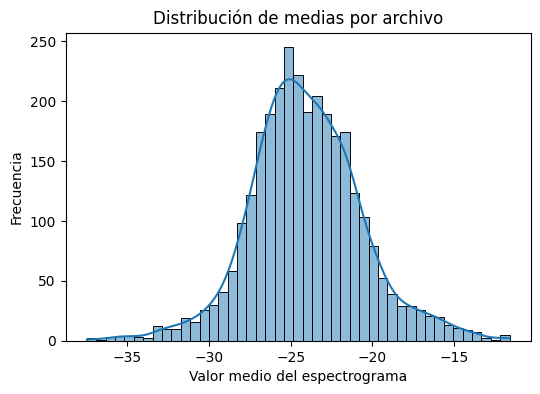

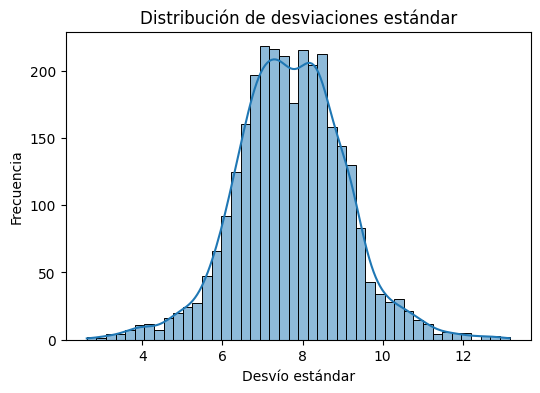

In [6]:
# Visualización de la distribución de valores
plt.figure(figsize=(6,4))
sns.histplot(all_means, kde=True)
plt.title("Distribución de medias por archivo")
plt.xlabel("Valor medio del espectrograma")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(all_stds, kde=True)
plt.title("Distribución de desviaciones estándar")
plt.xlabel("Desvío estándar")
plt.ylabel("Frecuencia")
plt.show()

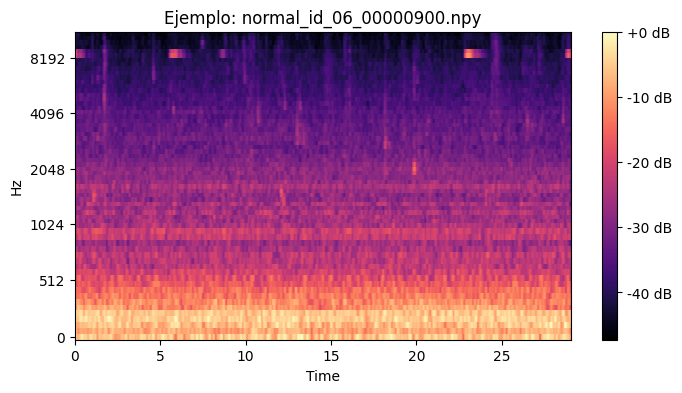

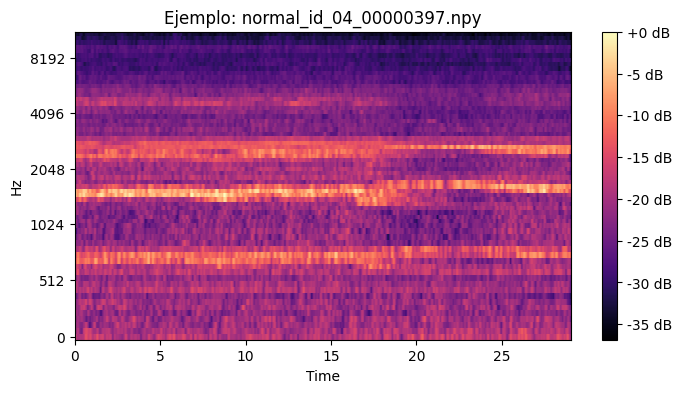

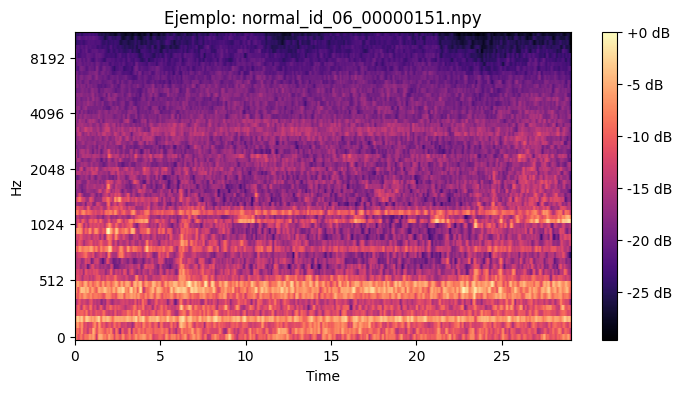

In [7]:
# Visualizar ejemplos individuales
n_examples = 3
sample_files = np.random.choice(files, n_examples, replace=False)

for f in sample_files:
    mel = np.load(os.path.join(DATA_DIR, f))
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mel, x_axis="time", y_axis="mel", cmap="magma")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Ejemplo: {f}")
    plt.show()

In [16]:
# Normalización
mel = np.load(os.path.join(DATA_DIR, files[0]))
print(f"Valores actuales: min={mel.min():.2f}, max={mel.max():.2f}")

normalized = (mel - mel.mean()) / (mel.std() + 1e-6)
print(f"Después de normalizar: min={normalized.min():.2f}, max={normalized.max():.2f}")

Valores actuales: min=-46.77, max=0.00
Después de normalizar: min=-2.38, max=3.05
